here i am importing the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.manifold import TSNE

Here i am reading the csv file and checking whether are null elements or not

In [3]:
data = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/DataPCA.csv")
data.isnull().sum()

x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
x7    0
dtype: int64

## plotting the histograms

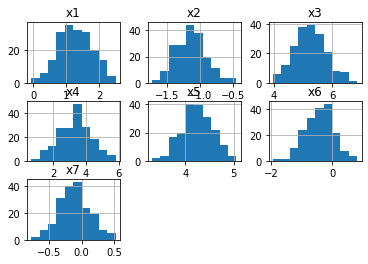

In [6]:

hist = data.hist()

### here i am preprocessing the data and calculating the variance and cummulative variance vs no of components.

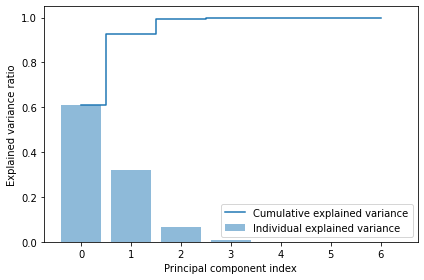

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(data)
data_std = sc.transform(data)

#
# Import eigh method for calculating eigenvalues and eigenvectirs
#
from numpy.linalg import eigh
#
# Determine covariance matrix
#
cov_matrix = np.cov(data_std, rowvar=False)
#
# Determine eigenvalues and eigenvectors
#
egnvalues, egnvectors = eigh(cov_matrix)
#
# Determine explained variance
#
total_egnvalues = sum(egnvalues)
var_exp = [(i/total_egnvalues) for i in sorted(egnvalues, reverse=True)]
#
# Plot the explained variance against cumulative explained variance
#
import matplotlib.pyplot as plt
cum_sum_exp = np.cumsum(var_exp)
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

References:
For histogram plot:
1. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html

For explained variance and its plot:

1. https://vitalflux.com/pca-explained-variance-concept-python-example/#:~:text=Explained%20variance%20is%20calculated%20as,decomposition%20PCA%20class